In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as pearr

import torch
import torch.utils as utils
from torchvision import datasets, transforms

In [7]:
dataset_name = 'train_data9'
train_set = datasets.ImageFolder(root='dataset/preproced_data/%s/'%dataset_name,
                       transform=transforms.Compose([
#                              transforms.RandomHorizontalFlip(p=0.5),
##                             transforms.RandomVerticalFlip(p=0.5),
##                             transforms.RandomRotation(90),
                         transforms.Grayscale(),
                         transforms.Resize((64,64)),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
train_loader = utils.data.DataLoader(dataset=train_set, batch_size=1000,shuffle=True)

for idx, (data, target) in enumerate(train_loader):
    x_train = data.cpu().numpy()

score_num = 1
dir_name = ['abnormal', 'normal']
test_set = datasets.ImageFolder(root='dataset/dongdong2/%s/'%dir_name[score_num],
                           transform=transforms.Compose([
#                              transforms.RandomHorizontalFlip(p=0.5),
                             transforms.Grayscale(),
                             transforms.Resize((64,64)),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
test_loader = utils.data.DataLoader(dataset=test_set,batch_size=100,shuffle=False)

for idx, (data, target) in enumerate(test_loader):
    x_test = data.cpu().numpy()
    
score_num = 0    
test_set = datasets.ImageFolder(root='dataset/dongdong2/%s/'%dir_name[score_num],
                           transform=transforms.Compose([
#                              transforms.RandomHorizontalFlip(p=0.5),
                             transforms.Grayscale(),
                             transforms.Resize((64,64)),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
test_loader = utils.data.DataLoader(dataset=test_set,batch_size=100,shuffle=False)

for idx, (data, target) in enumerate(test_loader):
    x_out = data.cpu().numpy()

x_train = np.reshape(x_train, (len(x_train),-1))
x_test = np.reshape(x_test, (len(x_test), -1))
x_out = np.reshape(x_out, (len(x_out),-1))
print(np.shape(x_train), np.shape(x_test), np.shape(x_out))

(631, 4096) (25, 4096) (31, 4096)


1 (25,) (31,)
(25,) (31,)
0.0029646675866967466


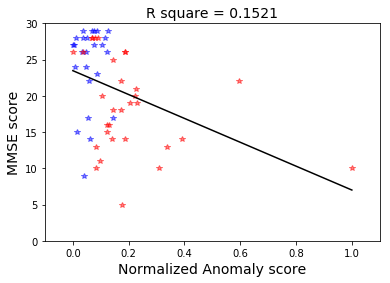

2 (25,) (31,)
(25,) (31,)
0.0037820819585957957


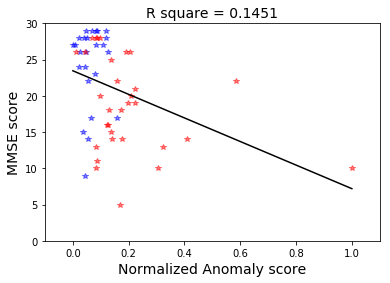

3 (25,) (31,)
(25,) (31,)
0.004993129041649483


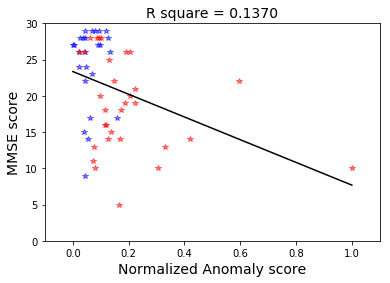

4 (25,) (31,)
(25,) (31,)
0.006789069719879075


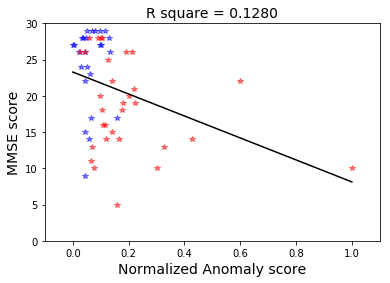

5 (25,) (31,)
(25,) (31,)
0.008470873997718271


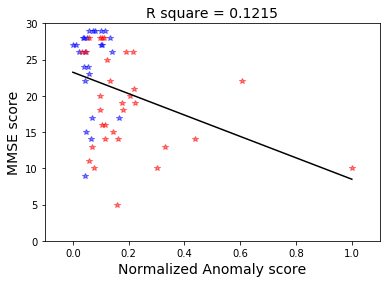

6 (25,) (31,)
(25,) (31,)
0.009391666341287783


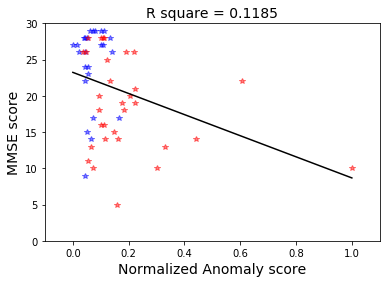

7 (25,) (31,)
(25,) (31,)
0.010451316304428866


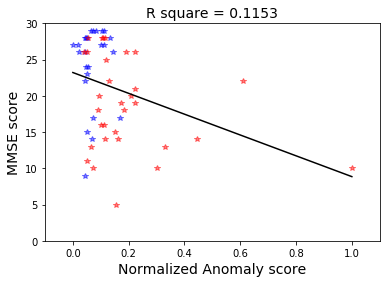

8 (25,) (31,)
(25,) (31,)
0.011400238409078351


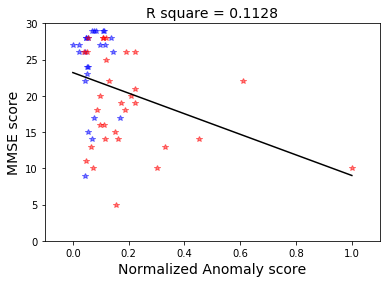

9 (25,) (31,)
(25,) (31,)
0.012075883311761114


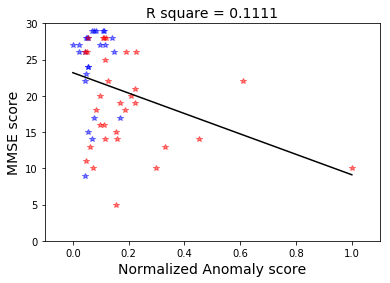

10 (25,) (31,)
(25,) (31,)
0.012873281132389452


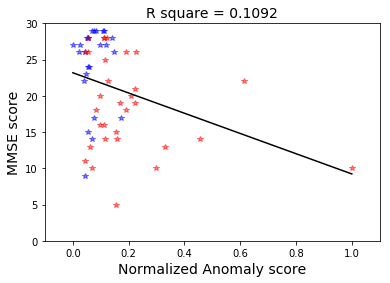

11 (25,) (31,)
(25,) (31,)
0.013622397442752983


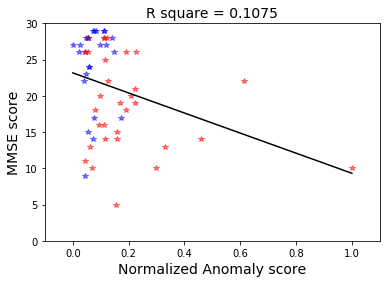

12 (25,) (31,)
(25,) (31,)
0.014183654132017099


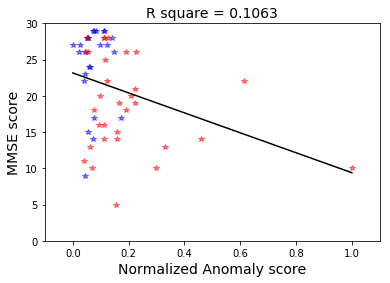

13 (25,) (31,)
(25,) (31,)
0.01486308124575688


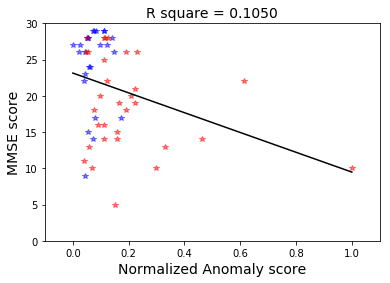

14 (25,) (31,)
(25,) (31,)
0.015508529864089012


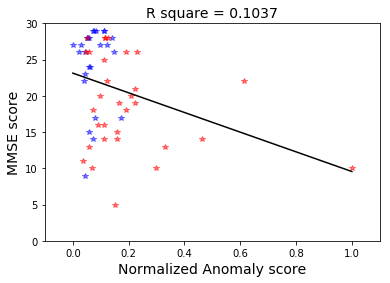

15 (25,) (31,)
(25,) (31,)
0.016006019244041984


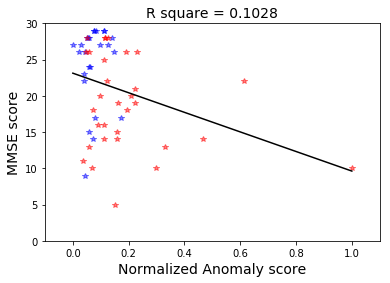

16 (25,) (31,)
(25,) (31,)
0.01652848013046687


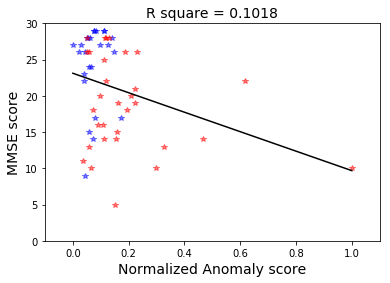

17 (25,) (31,)
(25,) (31,)
0.01715295935955376


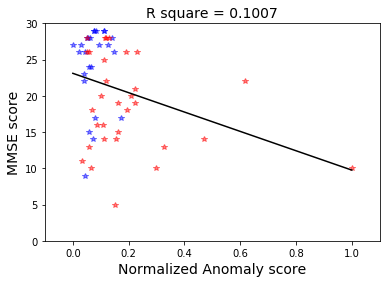

18 (25,) (31,)
(25,) (31,)
0.017846158693063097


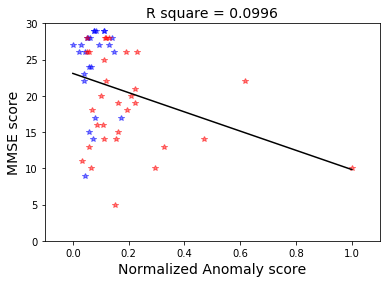

19 (25,) (31,)
(25,) (31,)
0.01858994340471833


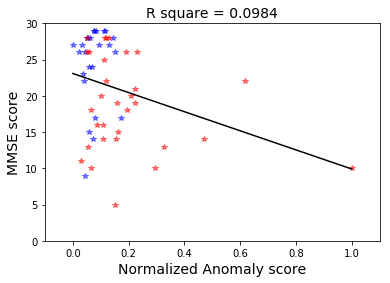

20 (25,) (31,)
(25,) (31,)


/opt/anaconda3/envs/khj/lib/python3.7/site-packages/sklearn/svm/classes.py:1211: RuntimeWarning: invalid value encountered in add
  return self.decision_function(X) + self.offset_
/opt/anaconda3/envs/khj/lib/python3.7/site-packages/sklearn/svm/classes.py:1211: RuntimeWarning: invalid value encountered in add
  return self.decision_function(X) + self.offset_
/opt/anaconda3/envs/khj/lib/python3.7/site-packages/sklearn/svm/classes.py:1211: RuntimeWarning: invalid value encountered in add
  return self.decision_function(X) + self.offset_
/opt/anaconda3/envs/khj/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

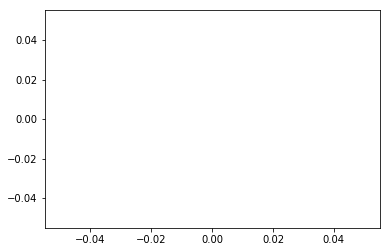

In [9]:
fpr_list = []
tpr_list = []
for k in range(1,21):
    clf = svm.OneClassSVM(nu=0.05*k, kernel='rbf', gamma='auto')
    clf.fit(x_train)
    y_pred_train = clf.score_samples(x_train)
    y_pred_test = clf.score_samples(x_test)
    y_pred_out = clf.score_samples(x_out)
    print(k, np.shape(y_pred_test), np.shape(y_pred_out))
    
    nm_mmse = np.loadtxt('dataset/dongdong2/normal/normal_1/MMSE_1.txt')
    ab_mmse = np.loadtxt('dataset/dongdong2/abnormal/abnormal_0/MMSE_0.txt')
    print(np.shape(nm_mmse), np.shape(ab_mmse))

    mmse_list = np.append(nm_mmse, ab_mmse)
    score_list = np.append(y_pred_test, y_pred_out)
    score_list = 1-((score_list - np.min(score_list))/(np.max(score_list)-np.min(score_list)))
    
    if k==6:
        np.save('../paper_figure/score_list_OCSVM.npy', score_list)
    
    plt.plot(score_list[:25], mmse_list[:25], 'b*', alpha=0.5)
    plt.plot(score_list[25:], mmse_list[25:], 'r*', alpha=0.5)

    line_fitter = LinearRegression()
    line_fitter.fit(score_list.reshape(-1,1), mmse_list)
    R_, p = pearr(score_list, mmse_list)
    rsqr = R_**2
    print(p)

    a = np.min(score_list)
    b = np.max(score_list)
    plt.plot([a,b], line_fitter.predict(np.reshape([a,b],(-1,1))), 'k')
    plt.xlabel('Normalized Anomaly score', fontsize=14)
    plt.ylabel('MMSE score', fontsize=14)
    plt.ylim(0,30)
    plt.xlim(-0.1,1.1)
    plt.title('R square = %.4f'%rsqr, fontsize=14)
    plt.savefig('mmse_img/mmse_plot_%.2f.png'%(k*0.05))
    plt.show()